<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/luisa_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# import pandas as pd
# import pickle
# import seaborn as sns

# import matplotlib.pyplot as plt

# from nltk.stem import SnowballStemmer
# from wordcloud import WordCloud 

# import re

In [32]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
#import sqlalchemy as sql
import datetime

from PIL import Image 

import pickle

In [ ]:
# name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t')[['nconst','primaryName','primaryProfession']]


In [ ]:

# df = pd.read_csv('myfile.csv',skiprows=lambda x: x not in rownumberList)

# title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t')[['tconst','nconst']]

In [ ]:
col_list = ['nconst','primaryName','primaryProfession']


name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list)


In [ ]:
col_list2 = ['tconst','nconst']
# rownumberList = [1,2,3]
title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)
# df = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz',skiprows=lambda x: x not in rownumberList)
# # , skiprows=lambda x: x not in rownumberList)



In [ ]:
options = ['tt0111161', 'tt0468569','tt1375666','tt0137523','tt0109830','tt0110912','tt0068646','tt0133093','tt0167260','tt0120737'] 
    
# selecting rows based on condition 
rslt_df = title_p[title_p['tconst'].isin(options)] 
    
print('\nResult title_p :\n',
      rslt_df)


Result title_p :
              tconst     nconst
578329    tt0068646  nm0722000
578330    tt0068646  nm0000008
578331    tt0068646  nm0000199
578332    tt0068646  nm0001001
578333    tt0068646  nm0000473
...             ...        ...
18854560  tt1375666  nm0634240
18854566  tt1375666  nm0858799
18854567  tt1375666  nm0001877
18854573  tt1375666  nm0002892
18854574  tt1375666  nm0809059

[100 rows x 2 columns]


In [ ]:
# other = pd.DataFrame({'title_p': ['tconst', 'nconst'],
#                       'name_b': ['nconst', 'primaryName', 'primaryProfession']})

# result = pd.concat([rslt_df, name_b], axis=1, join="outer")

top_movies= pd.merge(rslt_df, name_b, how='inner', on=['nconst', 'nconst'])



In [22]:
top_movies.to_pickle('topm6.pickle')

NameError: ignored

In [ ]:
# result.to_pickle('topm4.pickle')

In [6]:
top_movies5 = pd.read_pickle("/topm6.pickle")


In [7]:
top_movies5[['P1', 'P2', 'P3']] = top_movies5['primaryProfession'].str.split(',', expand=True)
top_movies5

,tconst,nconst,primaryName,primaryProfession,P1,P2,P3
0,tt0068646,nm0722000,William Reynolds,"editor,editorial_department,producer",editor,editorial_department,producer
1,tt0068646,nm0000008,Marlon Brando,"actor,soundtrack,director",actor,soundtrack,director
2,tt0068646,nm0000199,Al Pacino,"actor,producer,soundtrack",actor,producer,soundtrack
3,tt0068646,nm0001001,James Caan,"actor,soundtrack,director",actor,soundtrack,director
4,tt0068646,nm0000473,Diane Keaton,"actress,producer,soundtrack",actress,producer,soundtrack
...,...,...,...,...,...,...,...
95,tt1375666,nm0913822,Ken Watanabe,"actor,producer,director",actor,producer,director
96,tt1375666,nm0858799,Emma Thomas,"producer,miscellaneous,actress",producer,miscellaneous,actress
97,tt1375666,nm0001877,Hans Zimmer,"music_department,composer,soundtrack",music_department,composer,soundtrack
98,tt1375666,nm0002892,Wally Pfister,"cinematographer,camera_department,director",cinematographer,camera_department,director


In [29]:
condition = top_movies5['P1'] == 'actor'
condition2 = top_movies5['P2'] == 'actor' 
condition3 = top_movies5['P3'] == 'actor'


actors = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
actors['primaryName'].value_counts()




Orlando Bloom           2
Ian McKellen            2
Elijah Wood             2
Marlon Brando           1
Jim Uhls                1
Brad Pitt               1
Edward Norton           1
Meat Loaf               1
Zach Grenier            1
David Fincher           1
Chuck Palahniuk         1
Ross Grayson Bell       1
Hugo Weaving            1
Viggo Mortensen         1
Eric Monette            1
Christian Bale          1
Heath Ledger            1
Aaron Eckhart           1
Michael Caine           1
Leonardo DiCaprio       1
Joseph Gordon-Levitt    1
Elliot Page             1
Joel Silver             1
Keanu Reeves            1
Laurence Fishburne      1
Al Pacino               1
James Caan              1
Steve Tisch             1
Tom Hanks               1
Gary Sinise             1
Winston Groom           1
David Wasco             1
John Travolta           1
Samuel L. Jackson       1
Bruce Willis            1
Quentin Tarantino       1
Lawrence Bender         1
Tim Robbins             1
Morgan Freem

In [39]:
condition = top_movies5['P1'] == 'actress'
condition2 = top_movies5['P2'] == 'actress' 
condition3 = top_movies5['P3'] == 'actress'


actress = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
actress['primaryName'].value_counts()

Diane Keaton        1
Robin Wright        1
Sally Field         1
Uma Thurman         1
Carrie-Anne Moss    1
Emma Thomas         1
Name: primaryName, dtype: int64

In [40]:
condition = top_movies5['P1'] == 'producer'
condition2 = top_movies5['P2'] == 'producer'
condition3 = top_movies5['P3'] == 'producer'


producer = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
producer['primaryName'].value_counts()

Philippa Boyens      2
Christopher Nolan    2
Fran Walsh           2
Peter Jackson        2
Orlando Bloom        2
                    ..
Stephen King         1
Niki Marvin          1
Tim Sanders          1
Sean Bean            1
Emma Thomas          1
Name: primaryName, Length: 68, dtype: int64

In [41]:
condition = top_movies5['P1'] == 'director'
condition2 = top_movies5['P2'] == 'director'
condition3 = top_movies5['P3'] == 'director'


director = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
director['primaryName'].value_counts()

Peter Jackson           2
Christopher Nolan       2
Lana Wachowski          1
Ken Watanabe            1
David S. Goyer          1
Jonathan Nolan          1
Heath Ledger            1
Ross Grayson Bell       1
David Fincher           1
Art Linson              1
Bill Pope               1
Lilly Wachowski         1
Marlon Brando           1
James Caan              1
Niki Marvin             1
Frank Darabont          1
Tim Robbins             1
Andrzej Sekula          1
Roger Avary             1
Robert Zemeckis         1
Gary Sinise             1
Robin Wright            1
Gordon Willis           1
Francis Ford Coppola    1
Wally Pfister           1
Name: primaryName, dtype: int64

NameError: ignored

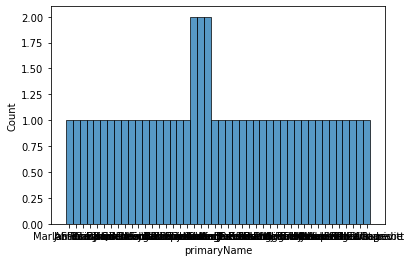

In [10]:
top_movies5['primaryName'].value_counts()

Peter Jackson        2
Christopher Nolan    2
J.R.R. Tolkien       2
Barrie M. Osborne    2
Orlando Bloom        2
                    ..
Lawrence Bender      1
Roger Avary          1
Quentin Tarantino    1
Bruce Willis         1
Lee Smith            1
Name: primaryName, Length: 91, dtype: int64

,primaryName,tconst
56,Barrie M. Osborne,tt0120737
57,Barrie M. Osborne,tt0167260


In [ ]:
condition = top_movies5['P1'] == 'actor'
condition2 = top_movies5['P2'] == 'actor' 
condition3 = top_movies5['P3'] == 'actor'

# actors = name_basics2[condition | condition2 | condition3][['nconst','primaryName', 'P1','P2','P3','knownForTitles']]

actors = top_movies5[condition | condition2 | condition3][['tconst','primaryName','P1','P2','P3']]
# actors.sort_values(by=('primaryName'), ascending=False)

actors['P2'].value_counts()

# dfp= actors.groupby('tconst')['P1'].count().reset_index(name='avg_popularity') 
# dfp.sort_values(by=('avg_popularity'), ascending=False)


writer                4
director              4
producer              2
actor                 1
music_department      1
talent_agent          1
camera_department     1
assistant_director    1
stunts                1
Name: P2, dtype: int64

In [ ]:
condition5 = top_movies5['tconst'] == 'tt0111161'

M_red = top_movies5[condition5][['tconst','primaryName','P1','P2','P3']]


rows = M_red.index[[0,8,9]]

M_red.drop(rows, inplace=True)
M_red

,tconst,primaryName,P1,P2,P3
31,tt0111161,Tim Robbins,actor,producer,director
32,tt0111161,Morgan Freeman,actor,producer,soundtrack
33,tt0111161,Bob Gunton,actor,soundtrack,None
34,tt0111161,William Sadler,actor,soundtrack,producer
35,tt0111161,Frank Darabont,writer,producer,director
36,tt0111161,Stephen King,writer,producer,actor
37,tt0111161,Niki Marvin,producer,director,writer


In [ ]:
condition6 = top_movies5['tconst'] == 'tt0468569'

M_dn = top_movies5[condition6][['tconst','primaryName','P1','P2','P3']]
M_dn


,tconst,primaryName,P1,P2,P3
80,tt0468569,Charles Roven,producer,executive,None
81,tt0468569,Christian Bale,actor,editorial_department,producer
82,tt0468569,Heath Ledger,actor,director,soundtrack
83,tt0468569,Aaron Eckhart,actor,producer,soundtrack
84,tt0468569,Michael Caine,actor,producer,soundtrack
85,tt0468569,Christopher Nolan,writer,producer,director
87,tt0468569,Jonathan Nolan,writer,producer,director
88,tt0468569,David S. Goyer,writer,producer,director
89,tt0468569,Bob Kane,writer,miscellaneous,art_department
90,tt0468569,Lorne Orleans,producer,production_manager,miscellaneous


In [ ]:
condition7 = top_movies5['tconst'] == 'tt1375666'

M_in = top_movies5[condition7][['tconst','primaryName','P1','P2','P3']]
rows = M_in.index[[1,7,9]]
M_in.drop(rows, inplace=True)
M_in

,tconst,primaryName,P1,P2,P3
86,tt1375666,Christopher Nolan,writer,producer,director
92,tt1375666,Leonardo DiCaprio,actor,producer,soundtrack
93,tt1375666,Joseph Gordon-Levitt,actor,producer,soundtrack
94,tt1375666,Elliot Page,actor,producer,soundtrack
95,tt1375666,Ken Watanabe,actor,producer,director
96,tt1375666,Emma Thomas,producer,miscellaneous,actress
98,tt1375666,Wally Pfister,cinematographer,camera_department,director


In [ ]:
condition8 = top_movies5['tconst'] == 'tt0137523'

M_fc = top_movies5[condition8][['tconst','primaryName','P1','P2','P3']]

M_fc

,tconst,primaryName,P1,P2,P3
68,tt0137523,Art Linson,producer,writer,director
69,tt0137523,Brad Pitt,actor,producer,soundtrack
70,tt0137523,Edward Norton,actor,producer,writer
71,tt0137523,Meat Loaf,actor,soundtrack,producer
72,tt0137523,Zach Grenier,actor,soundtrack,None
73,tt0137523,David Fincher,producer,director,actor
74,tt0137523,Chuck Palahniuk,writer,actor,producer
75,tt0137523,Jim Uhls,writer,producer,actor
76,tt0137523,Ross Grayson Bell,producer,director,actor
77,tt0137523,Ceán Chaffin,producer,cinematographer,None


In [ ]:
condition9 = top_movies5['tconst'] == 'tt0109830'

M_fg = top_movies5[condition9][['tconst','primaryName','P1','P2','P3']]
M_fg

,tconst,primaryName,P1,P2,P3
10,tt0109830,Steve Tisch,producer,actor,miscellaneous
11,tt0109830,Tom Hanks,producer,actor,soundtrack
12,tt0109830,Robin Wright,actress,producer,director
13,tt0109830,Gary Sinise,actor,producer,director
14,tt0109830,Sally Field,actress,producer,soundtrack
15,tt0109830,Robert Zemeckis,producer,writer,director
16,tt0109830,Winston Groom,writer,actor,None
17,tt0109830,Eric Roth,producer,writer,miscellaneous
18,tt0109830,Wendy Finerman,producer,None,None
19,tt0109830,Steve Starkey,producer,assistant_director,editorial_department


In [ ]:
condition10 = top_movies5['tconst'] == 'tt0110912'

M_pf = top_movies5[condition10][['tconst','primaryName','P1','P2','P3']]
M_pf

,tconst,primaryName,P1,P2,P3
20,tt0110912,David Wasco,production_designer,art_department,actor
21,tt0110912,John Travolta,actor,soundtrack,producer
22,tt0110912,Uma Thurman,actress,soundtrack,producer
23,tt0110912,Samuel L. Jackson,actor,producer,soundtrack
24,tt0110912,Bruce Willis,actor,producer,soundtrack
25,tt0110912,Quentin Tarantino,writer,actor,producer
26,tt0110912,Roger Avary,writer,producer,director
27,tt0110912,Lawrence Bender,producer,camera_department,actor
28,tt0110912,Andrzej Sekula,cinematographer,director,camera_department
29,tt0110912,Sally Menke,editor,producer,sound_department


In [ ]:
condition11 = top_movies5['tconst'] == 'tt0068646'

M_tgf = top_movies5[condition11][['tconst','primaryName','P1','P2','P3']]
rows = M_tgf.index[8]
M_tgf .drop(rows, inplace=True)
M_tgf

,tconst,primaryName,P1,P2,P3
0,tt0068646,William Reynolds,editor,editorial_department,producer
1,tt0068646,Marlon Brando,actor,soundtrack,director
2,tt0068646,Al Pacino,actor,producer,soundtrack
3,tt0068646,James Caan,actor,soundtrack,director
4,tt0068646,Diane Keaton,actress,producer,soundtrack
5,tt0068646,Francis Ford Coppola,producer,director,writer
6,tt0068646,Mario Puzo,writer,None,None
7,tt0068646,Albert S. Ruddy,writer,producer,miscellaneous
9,tt0068646,Gordon Willis,cinematographer,director,camera_department


In [ ]:
condition12 = top_movies5['tconst'] == 'tt0133093'

M_tm = top_movies5[condition12][['tconst','primaryName','P1','P2','P3']]
rows = M_tm.index[8]
M_tm .drop(rows, inplace=True)
M_tm

,tconst,primaryName,P1,P2,P3
58,tt0133093,Zach Staenberg,editor,editorial_department,producer
59,tt0133093,Keanu Reeves,actor,producer,soundtrack
60,tt0133093,Laurence Fishburne,actor,producer,writer
61,tt0133093,Carrie-Anne Moss,actress,producer,None
62,tt0133093,Hugo Weaving,actor,soundtrack,producer
63,tt0133093,Lana Wachowski,writer,producer,director
64,tt0133093,Lilly Wachowski,writer,producer,director
65,tt0133093,Joel Silver,producer,actor,miscellaneous
67,tt0133093,Bill Pope,cinematographer,director,camera_department


In [ ]:
condition13 = top_movies5['tconst'] == 'tt0167260'

M_lr2 = top_movies5[condition13][['tconst','primaryName','P1','P2','P3']]
# rows = M_tm.index[8]
# M_tm .drop(rows, inplace=True)
M_lr2 

,tconst,primaryName,P1,P2,P3
42,tt0167260,Elijah Wood,actor,producer,soundtrack
44,tt0167260,Ian McKellen,actor,soundtrack,writer
46,tt0167260,Orlando Bloom,actor,producer,soundtrack
49,tt0167260,Peter Jackson,producer,director,writer
51,tt0167260,J.R.R. Tolkien,writer,soundtrack,None
53,tt0167260,Fran Walsh,writer,casting_department,producer
55,tt0167260,Philippa Boyens,writer,producer,soundtrack
57,tt0167260,Barrie M. Osborne,producer,production_manager,assistant_director
78,tt0167260,Viggo Mortensen,actor,producer,soundtrack
79,tt0167260,Eric Monette,miscellaneous,producer,actor


In [ ]:
condition14 = top_movies5['tconst'] == 'tt0167260'

M_lr3 = top_movies5[condition14][['tconst','primaryName','P1','P2','P3']]
# rows = M_tm.index[8]
# M_tm .drop(rows, inplace=True)
M_lr3 

,tconst,primaryName,P1,P2,P3
42,tt0167260,Elijah Wood,actor,producer,soundtrack
44,tt0167260,Ian McKellen,actor,soundtrack,writer
46,tt0167260,Orlando Bloom,actor,producer,soundtrack
49,tt0167260,Peter Jackson,producer,director,writer
51,tt0167260,J.R.R. Tolkien,writer,soundtrack,None
53,tt0167260,Fran Walsh,writer,casting_department,producer
55,tt0167260,Philippa Boyens,writer,producer,soundtrack
57,tt0167260,Barrie M. Osborne,producer,production_manager,assistant_director
78,tt0167260,Viggo Mortensen,actor,producer,soundtrack
79,tt0167260,Eric Monette,miscellaneous,producer,actor


In [ ]:
# top_movies3[['P1', 'P2', 'P3']] = top_movies3['primaryProfession'].str.split(',', expand=True)

# top_movies3

In [ ]:
top_movies3.to_pickle('topm3.pickle')

In [ ]:
# rownumberList = [1,2,3]
# title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)

In [ ]:
# name_b.to_pickle("zz-name.basics.pickle")
# title_p.to_pickle("zz-title.principals.pickle")

In [ ]:
# name_basics= name_b.drop(['birthYear', 'deathYear','knownForTitles'],axis=1)

# name_basics.head()

In [ ]:
# title_pri= title_p.drop(['category','job','characters'],axis=1)

# title_pri.head()

In [ ]:
# top_movies= pd.merge(title_p, name_b, how='inner', on=['nconst', 'nconst'])
# # top_movies.to_pickle('topm.pickle')

# top_movies = pd.concat([title_p, name_b], axis=1, join="inner")


In [ ]:
# top_movies[['P1', 'P2', 'P3']] = top_movies['primaryProfession'].str.split(',', expand=True)

# top_movies

In [ ]:
# top_movies2 = pd.read_pickle("/content/topm.pickle")
# top_movies2 = top_movies2.drop(['ordering'],axis=1)
# top_movies2 = top_movies2.drop_duplicates()

In [ ]:
# top_movies2.head(30)

In [ ]:
#top_movies2 duplicates and ordering

# top_movies2 = top_movies2.drop(['ordering'],axis=1)

# top_movies2 = top_movies2.drop_duplicates()



In [ ]:
# top_movies2[['P1', 'P2', 'P3']] = top_movies2['primaryProfession'].str.split(',', expand=True)

# top_movies2

In [ ]:
# top_movies2['P1'] = top_movies2['primaryProfession'].str.split(',')[0]

In [ ]:
# top_movies2.to_pickle('topm2.pickle')

In [ ]:
# top_movies3 = pd.read_pickle("/content/topm.pickle")
# top_movies3